In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("C:/Users/adity/Downloads/Carbon Emission.csv/Carbon Emission.csv")

# Drop rows with missing target values
data = data.dropna(subset=["CarbonEmission"])

# Separate features and target variable
X = data.drop(columns=["CarbonEmission"])
y = data["CarbonEmission"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Preserve column names
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Scale numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)

# Combine processed categorical and numerical data
X_final = pd.concat([X_scaled, X_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Build Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Neural Network Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")


C:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 6112080.0000 - mae: 2259.9006 - val_loss: 6258333.0000 - val_mae: 2292.3770
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6071734.0000 - mae: 2255.5396 - val_loss: 6160207.0000 - val_mae: 2281.6997
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5969579.0000 - mae: 2245.4397 - val_loss: 6012963.0000 - val_mae: 2262.1357
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5786353.0000 - mae: 2211.3323 - val_loss: 5787802.5000 - val_mae: 2229.8147
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5586552.5000 - mae: 2183.7188 - val_loss: 5541905.0000 - val_mae: 2190.9299
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5279488.0000 - mae: 2137.5786 - val_loss: 5235928.5000 - val_mae: 2140.9390
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5058031.0000 - mae: 2097.6484 - val_loss: 4943525.5000 - val_mae: 2092.7305
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 

Enter your body type (e.g., overweight, obese, normal):  normal
Enter your sex (male/female):  male
Enter your diet (e.g., omnivore, vegetarian, vegan):  omnivore
How often do you shower (e.g., daily, less frequently):  daily
Enter heating energy source (e.g., natural gas, coal, wood):  wood
Enter transport type (e.g., public, private, walk/bicycle):  private
Enter vehicle type (if applicable, e.g., petrol, diesel, electric):  petrol
How often do you socialize (e.g., often, rarely, never):  often
Enter your monthly grocery bill:  5000
How often do you travel by air (e.g., frequently, rarely, never):  rarely
Enter vehicle monthly distance in km:  400
Enter waste bag size (e.g., small, large, extra large):  large
Enter waste bag weekly count:  4
How long do you use TV/PC daily (hours):  4
How many new clothes do you buy monthly:  4
How long do you use the internet daily (hours):  5
Do you use energy-efficient appliances? (Yes/No):  yes
Enter the materials you recycle (e.g., ['Metal', 'Pl

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

🌍 **Carbon Footprint Report** 🌍
📊 **Total Carbon Emission**: 4153.50 kg CO₂ per month

📌 **Breakdown by Category:**
  - Transport: 80.00 kg CO₂
  - Energy: 150.00 kg CO₂
  - Food: 200.00 kg CO₂
  - Shopping: 200.00 kg CO₂
  - Waste: 40.00 kg CO₂


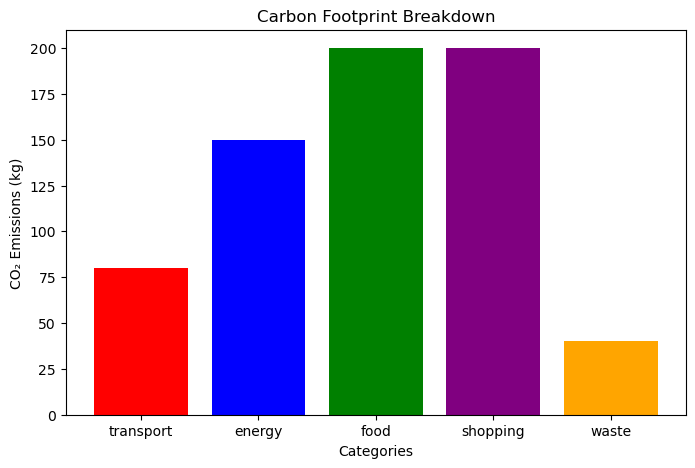


✅ **AI-Powered Reduction Strategies**
➡️ Reduce meat consumption and opt for plant-based meals.
➡️ Buy sustainable products and reduce unnecessary purchases.


In [25]:
# Function to take user input and predict carbon footprint
def generate_carbon_report():
    user_input = {
        "Body Type": input("Enter your body type (e.g., overweight, obese, normal): "),
        "Sex": input("Enter your sex (male/female): "),
        "Diet": input("Enter your diet (e.g., omnivore, vegetarian, vegan): "),
        "How Often Shower": input("How often do you shower (e.g., daily, less frequently): "),
        "Heating Energy Source": input("Enter heating energy source (e.g., natural gas, coal, wood): "),
        "Transport": input("Enter transport type (e.g., public, private, walk/bicycle): "),
        "Vehicle Type": input("Enter vehicle type (if applicable, e.g., petrol, diesel, electric): "),
        "Social Activity": input("How often do you socialize (e.g., often, rarely, never): "),
        "Monthly Grocery Bill": float(input("Enter your monthly grocery bill: ")),
        "Frequency of Traveling by Air": input("How often do you travel by air (e.g., frequently, rarely, never): "),
        "Vehicle Monthly Distance Km": float(input("Enter vehicle monthly distance in km: ")),
        "Waste Bag Size": input("Enter waste bag size (e.g., small, large, extra large): "),
        "Waste Bag Weekly Count": int(input("Enter waste bag weekly count: ")),
        "How Long TV PC Daily Hour": int(input("How long do you use TV/PC daily (hours): ")),
        "How Many New Clothes Monthly": int(input("How many new clothes do you buy monthly: ")),
        "How Long Internet Daily Hour": int(input("How long do you use the internet daily (hours): ")),
        "Energy efficiency": input("Do you use energy-efficient appliances? (Yes/No): "),
        "Recycling": input("Enter the materials you recycle (e.g., ['Metal', 'Plastic']): "),
        "Cooking_With": input("Enter cooking appliances used (e.g., ['Stove', 'Microwave']): ")
    }

    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])

    # Apply the same encoding and scaling used during training
    user_encoded = pd.DataFrame(encoder.transform(user_df[categorical_cols]))
    user_encoded.columns = encoder.get_feature_names_out(categorical_cols)

    user_scaled = pd.DataFrame(scaler.transform(user_df[numerical_cols]), columns=numerical_cols)

    user_final = pd.concat([user_scaled, user_encoded], axis=1)

    # Predict carbon footprint
    carbon_emission = model.predict(user_final)[0][0]

    # Define category-wise emission factors (These should be tuned based on actual dataset insights)
    transport_emission = user_df["Vehicle Monthly Distance Km"].values[0] * 0.2  # Assuming 0.2 kg CO₂ per km
    energy_emission = 300 if user_df["Heating Energy Source"].values[0] in ["coal", "natural gas"] else 150  # Approximate values
    food_emission = 200 if user_df["Diet"].values[0] == "omnivore" else 100  # Plant-based diets have lower emissions
    shopping_emission = user_df["How Many New Clothes Monthly"].values[0] * 50  # Each new clothing item ~50kg CO₂
    waste_emission = user_df["Waste Bag Weekly Count"].values[0] * 10  # Approximate per bag emissions

    # Carbon footprint breakdown
    carbon_breakdown = {
        "transport": transport_emission,
        "energy": energy_emission,
        "food": food_emission,
        "shopping": shopping_emission,
        "waste": waste_emission
    }

    # AI-powered reduction tips
    reduction_tips = {
        "transport": "Use public transport or carpool to reduce emissions.",
        "energy": "Switch to renewable energy sources to lower footprint.",
        "food": "Reduce meat consumption and opt for plant-based meals.",
        "shopping": "Buy sustainable products and reduce unnecessary purchases.",
        "waste": "Recycle and compost to minimize waste emissions."
    }

    # Sort and select top 2 highest emissions sources
    sorted_categories = sorted(carbon_breakdown.items(), key=lambda x: x[1], reverse=True)

    # Print Carbon Footprint Report
    print("\n🌍 **Carbon Footprint Report** 🌍")
    print(f"📊 **Total Carbon Emission**: {carbon_emission:.2f} kg CO₂ per month")
    
    print("\n📌 **Breakdown by Category:**")
    for category, value in carbon_breakdown.items():
        print(f"  - {category.capitalize()}: {value:.2f} kg CO₂")

    # Plot trend analysis
    plt.figure(figsize=(8,5))
    plt.bar(carbon_breakdown.keys(), carbon_breakdown.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
    plt.xlabel("Categories")
    plt.ylabel("CO₂ Emissions (kg)")
    plt.title("Carbon Footprint Breakdown")
    plt.show()

    # Print AI-powered reduction strategies
    print("\n✅ **AI-Powered Reduction Strategies**")
    for category, _ in sorted_categories[:2]:  
        print(f"➡️ {reduction_tips[category]}")

# Run function to take input and generate report
generate_carbon_report()


In [29]:
import joblib
from tensorflow.keras.models import load_model

# Save the trained neural network model
model.save("carbon_footprint_model.h5")


In [31]:
import joblib

# Save the encoder
joblib.dump(encoder, "encoder.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [53]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
dataset_path = "C:/Users/adity/Downloads/sme_carbon_footprint_data.csv"  # Update this with your file path
df = pd.read_csv(dataset_path)

# Define categorical and numerical features
categorical_features = ["Industry Sector", "Location", "Raw Material"]
numerical_features = [
    "Number of Employees", "Annual Electricity Usage (kWh)", "Annual Fuel Consumption (liters)",
    "Percentage of Renewable Energy Used (%)", "Raw Material Quantity (tons)",
    "Total Annual Waste Generated (tons)", "Percentage of Waste Recycled (%)"
]

target_column = "Total Annual CO2 Emissions (metric tons)"

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

# Scale numerical variables
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Merge processed features
X = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
print("\n🔄 Training the model...")
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Save the trained model and encoders
model.save("carbon_emission_model1.h5")
joblib.dump(encoder, "encoder1.pkl")
joblib.dump(scaler, "scaler1.pkl")

print("\n✅ Model training complete! Now you can enter new data to predict emissions.")

# Function to predict emissions from user input
def predict_emissions():
    print("\n📌 Enter company details to predict CO₂ emissions:")

    # User inputs
    user_data = {
        "Industry Sector": input(f"Industry Sector {df['Industry Sector'].unique().tolist()}: "),
        "Location": input(f"Location {df['Location'].unique().tolist()}: "),
        "Raw Material": input(f"Raw Material {df['Raw Material'].unique().tolist()}: "),
        "Number of Employees": float(input("Number of Employees: ")),
        "Annual Electricity Usage (kWh)": float(input("Annual Electricity Usage (kWh): ")),
        "Annual Fuel Consumption (liters)": float(input("Annual Fuel Consumption (liters): ")),
        "Percentage of Renewable Energy Used (%)": float(input("Percentage of Renewable Energy Used (%): ")),
        "Raw Material Quantity (tons)": float(input("Raw Material Quantity (tons): ")),
        "Total Annual Waste Generated (tons)": float(input("Total Annual Waste Generated: ")),
        "Percentage of Waste Recycled (%)": float(input("Percentage of Waste Recycled: "))
    }

    # Convert input to DataFrame
    user_df = pd.DataFrame([user_data])

    # Encode categorical variables
    encoded_categorical = encoder.transform(user_df[categorical_features])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

    # Scale numerical variables
    scaled_numerical = scaler.transform(user_df[numerical_features])
    scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

    # Merge processed input
    processed_input = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

    # 🔄 Load model with compile=False to avoid loss function issue
    model = load_model("carbon_emission_model1.h5", compile=False)

    # ✅ Manually recompile the model
    model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
    prediction = model.predict(processed_input)

    print(f"\n🌍 Predicted CO₂ Emissions: {prediction[0][0]:.2f} metric tons")

# Run prediction
predict_emissions()



🔄 Training the model...
Epoch 1/50


C:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4377044480.0000 - mae: 57797.1602 - val_loss: 3930184704.0000 - val_mae: 53654.4141
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4603929088.0000 - mae: 59111.9766 - val_loss: 3912897280.0000 - val_mae: 53511.0039
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4494762496.0000 - mae: 58459.2188 - val_loss: 3851083776.0000 - val_mae: 53005.1641
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4273281280.0000 - mae: 56013.1172 - val_loss: 3719134464.0000 - val_mae: 51912.8359
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4178272000.0000 - mae: 55205.0039 - val_loss: 3502995968.0000 - val_mae: 50086.5547
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3641713920.0000 - mae: 50919.8398 - val_loss: 3199550464.0000 - val_mae: 47466.4844
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3368952576.0000 - mae: 48947.9375 - val_loss: 2821263104.0000 - val_mae: 44133.0664
Epo


✅ Model training complete! Now you can enter new data to predict emissions.

📌 Enter company details to predict CO₂ emissions:


Industry Sector ['Mining', 'Service', 'Manufacturing', 'Agriculture', 'Retail']:  mining
Location ['Cape Town, South Africa', 'Cairo, Egypt', 'Accra, Ghana', 'Nairobi, Kenya', 'Lagos, Nigeria']:  'Cairo, Egypt'
Raw Material ['Steel', 'Aluminum', 'Copper']:  steel
Number of Employees:  50
Annual Electricity Usage (kWh):  4567
Annual Fuel Consumption (liters):  345
Percentage of Renewable Energy Used (%):  80
Raw Material Quantity (tons):  45
Total Annual Waste Generated:  45
Percentage of Waste Recycled:  80


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

🌍 Predicted CO₂ Emissions: 77.43 metric tons
